In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Absenteeism_data.xlsx')
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [3]:
df = data.copy()

In [4]:
df = df.drop(['ID'], axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [5]:
df.describe()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,2016-12-31 00:45:15.428571392,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
min,0.000000,2015-07-06 00:00:00,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,2016-03-27 06:00:00,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,2016-12-19 00:00:00,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,2017-10-26 06:00:00,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,2018-05-31 00:00:00,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000
std,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082


In [6]:
df.info()
# NO null values
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason for Absence         700 non-null    int64         
 1   Date                       700 non-null    datetime64[ns]
 2   Transportation Expense     700 non-null    int64         
 3   Distance to Work           700 non-null    int64         
 4   Age                        700 non-null    int64         
 5   Daily Work Load Average    700 non-null    float64       
 6   Body Mass Index            700 non-null    int64         
 7   Education                  700 non-null    int64         
 8   Children                   700 non-null    int64         
 9   Pets                       700 non-null    int64         
 10  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.3 KB


# We are going to try and find possible reasons for absenteeism and which employees are likely to go missing during working hours


[Reason_for_absent](Features_description.png)


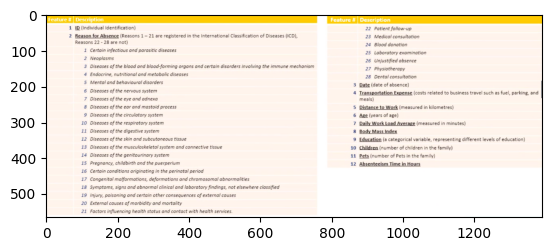

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.Figure(figsize=(16,9))
img = plt.Figure(figsize=(16,9))

img = mpimg.imread('Features_description.png')
plt.imshow(img)
plt.show()


In [8]:
df['Reason for Absence'].unique()
#for ML u need to give only numerical data

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [9]:
# one hot endcoding
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)

In [10]:
df = df.drop(['Reason for Absence'],axis=1)

In [11]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [12]:
reason_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_4 = reason_columns.loc[:, 22:].max(axis=1)

df = pd.concat([df, reason_1,reason_2,reason_3,reason_4],axis=1)
df.head()


,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [13]:
Column_Names = ['Date', 'Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Education','Children','Pets','Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4'	]
df.columns = Column_Names
                

In [14]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [15]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d %M %Y')
list_months = []

In [16]:
for i in range(df.shape[0]):
    list_months.append(df['Date'][i].month)

df['Month'] = list_months


In [17]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7


In [18]:
def date_to_weekday(date_value):
    return date_value.weekday()

df['Day of the week'] = df['Date'].apply(date_to_weekday)

In [19]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [20]:
df = df.drop(['Date'],axis=1)


In [21]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the week
0,289,36,33,239.554,30,1,2,1,4,False,False,False,True,7,1
1,118,13,50,239.554,31,1,1,0,0,False,False,False,False,7,1
2,179,51,38,239.554,31,1,0,0,2,False,False,False,True,7,2
3,279,5,39,239.554,24,1,2,0,4,True,False,False,False,7,3
4,289,36,33,239.554,30,1,2,1,2,False,False,False,True,7,3


In [22]:
df['Education'].unique()

array([1, 3, 2, 4])

In [23]:
df['Education'] = df['Education'].map({1:0, 2:1,3:1,4:1})

In [24]:
df_preprocessed = df.copy()

In [25]:
df['Absenteeism Time in Hours'].median()

np.float64(3.0)

In [26]:
targets = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)
# if person is absent for median no. of hours, then marking as absent

In [27]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [28]:
targets.sum()/targets.shape[0]

np.float64(0.45571428571428574)

# data should be equally distributed for training ML model. So the model accuracy will increase.
This is all data preprocessing part

# Stanardization and train-test split

In [35]:
#standardize to same scale
data_train = df.drop(['Absenteeism Time in Hours'], axis=1)

In [37]:
data_train.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the week
0,289,36,33,239.554,30,0,2,1,False,False,False,True,7,1
1,118,13,50,239.554,31,0,1,0,False,False,False,False,7,1
2,179,51,38,239.554,31,0,0,0,False,False,False,True,7,2
3,279,5,39,239.554,24,0,2,0,True,False,False,False,7,3
4,289,36,33,239.554,30,0,2,1,False,False,False,True,7,3


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
absenteeism_scalar = StandardScaler()

In [44]:
unscaled_inputs = data_train

In [45]:
scaled_inputs = absenteeism_scalar.fit_transform(unscaled_inputs)

In [46]:
scaled_inputs
#scaled on standard scale

array([[ 1.00584437,  0.41281584, -0.53606239, ...,  0.82136542,
         0.18272635, -0.68370352],
       [-1.57468098, -1.1418824 ,  2.13080317, ..., -1.21748491,
         0.18272635, -0.68370352],
       [-0.6541427 ,  1.42674947,  0.24830984, ...,  0.82136542,
         0.18272635, -0.00772546],
       ...,
       [ 1.62456682, -0.93909568, -1.32043461, ..., -1.21748491,
        -0.3882935 ,  0.66825259],
       [ 0.19094163, -0.93909568, -0.69293683, ...,  0.82136542,
        -0.3882935 ,  0.66825259],
       [ 1.03602595,  0.07483796,  0.56205873, ...,  0.82136542,
        -0.3882935 ,  0.66825259]], shape=(700, 14))

In [47]:
scaled_inputs.shape

(700, 14)

In [48]:
#train-test split

from sklearn.model_selection import train_test_split

train_test_split(scaled_inputs,targets)

[array([[-0.6541427 ,  1.42674947,  0.24830984, ...,  0.82136542,
          0.7537462 , -1.35968157],
        [ 1.03602595,  0.07483796,  0.56205873, ...,  0.82136542,
          0.7537462 ,  1.34423065],
        [ 1.00584437,  0.41281584, -0.53606239, ...,  0.82136542,
         -1.53033319,  0.66825259],
        ...,
        [ 0.04003371, -0.26313992, -1.32043461, ...,  0.82136542,
          1.61027597, -0.68370352],
        [-1.57468098, -1.1418824 ,  2.13080317, ...,  0.82136542,
          0.18272635,  1.34423065],
        [-1.57468098, -1.34466913,  0.09143539, ..., -1.21748491,
          1.32476605, -0.68370352]], shape=(525, 14)),
 array([[ 0.19094163, -0.06035319,  1.81705428, ...,  0.82136542,
          0.18272635, -1.35968157],
        [ 0.19094163, -0.66871337,  1.03268206, ..., -1.21748491,
          1.03925612,  1.34423065],
        [ 0.19094163, -0.93909568, -0.69293683, ..., -1.21748491,
          1.03925612,  0.66825259],
        ...,
        [ 0.19094163, -1.27707355,  0

In [ ]:
#distributing data into train test .
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8, random_state=20)

In [50]:
print(x_test.shape, y_test.shape)
print(x_train.shape, y_train.shape)

(140, 14) (140,)
(560, 14) (560,)


##  Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
reg = LogisticRegression()

In [53]:
reg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
reg.score(x_train, y_train)

0.7839285714285714

# Manually checking the accuracy

In [55]:
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [56]:
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [57]:
model_outputs == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [58]:
np.sum(model_outputs == y_train)

np.int64(439)

In [59]:
model_outputs.shape

(560,)

In [60]:
np.sum(model_outputs == y_train)/model_outputs.shape[0]

np.float64(0.7839285714285714)

In [61]:
reg.intercept_

array([-0.22178284])

In [62]:
reg.coef_

array([[ 0.70640686, -0.03937135, -0.20039574, -0.00427805,  0.31904773,
        -0.13505278,  0.38185537, -0.33342255,  2.07458229,  0.33454073,
         1.56073174,  1.32776177,  0.18829573, -0.07090252]])

In [63]:
unscaled_inputs.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Month', 'Day of the week'], dtype=object)

In [64]:
feature_name = unscaled_inputs.columns.values

In [65]:
summary_table = pd.DataFrame(columns=['feature_name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table

,feature_name,Coefficient
0,Transportation Expense,0.706407
1,Distance to Work,-0.039371
2,Age,-0.200396
3,Daily Work Load Average,-0.004278
4,Body Mass Index,0.319048
5,Education,-0.135053
6,Children,0.381855
7,Pets,-0.333423
8,Reason_1,2.074582
9,Reason_2,0.334541


if coefficient is positive and high, means it is impacting positively. higher the value of coeff, higher the reason of absenteeism.
 here reason_1 has the high value, meas chronic diseases has high value of absent than reason_2 which is related to pregnency 

# odds ratio

In [ ]:
summary_table['Odds_Ratio'] = np.exp(summary_table.Coefficient)
summary_table

,feature_name,Coefficient,Odds_Ratio
0,Transportation Expense,0.706407,2.026696
1,Distance to Work,-0.039371,0.961394
2,Age,-0.200396,0.818407
3,Daily Work Load Average,-0.004278,0.995731
4,Body Mass Index,0.319048,1.375817
5,Education,-0.135053,0.873670
6,Children,0.381855,1.465000
7,Pets,-0.333423,0.716467
8,Reason_1,2.074582,7.961220
9,Reason_2,0.334541,1.397299


In [68]:
#odds ratio is the ratio of the odds of an event occurring in one group to the odds of it occurring in another group
#odds ratio will tell you how you it will impact. Here reason_1 has 80% chances of absent, reason_2 has 14%

In [78]:
#drop distance to work, Daily workload average and day of the week, again train model, so model accuracy will increase
data_train_dropped = data_train.drop(['Distance to Work'], axis=1)
data_train_dropped = data_train_dropped.drop(['Daily Work Load Average'], axis=1)
data_train_dropped = data_train_dropped.drop(['Day of the week'], axis=1)



In [79]:
data_train_dropped.head()

,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Reason_1,Reason_2,Reason_3,Reason_4,Month
0,289,33,30,0,2,1,False,False,False,True,7
1,118,50,31,0,1,0,False,False,False,False,7
2,179,38,31,0,0,0,False,False,False,True,7
3,279,39,24,0,2,0,True,False,False,False,7
4,289,33,30,0,2,1,False,False,False,True,7


In [80]:
absenteeism_scalar_dropped = StandardScaler()
unscaled_inputs_dropped = data_train_dropped
scaled_inputs_dropped = absenteeism_scalar_dropped.fit_transform(unscaled_inputs_dropped)

In [81]:
scaled_inputs_dropped

array([[ 1.00584437, -0.53606239,  0.76743118, ..., -0.31448545,
         0.82136542,  0.18272635],
       [-1.57468098,  2.13080317,  1.00263338, ..., -0.31448545,
        -1.21748491,  0.18272635],
       [-0.6541427 ,  0.24830984,  1.00263338, ..., -0.31448545,
         0.82136542,  0.18272635],
       ...,
       [ 1.62456682, -1.32043461, -0.40857982, ..., -0.31448545,
        -1.21748491, -0.3882935 ],
       [ 0.19094163, -0.69293683, -0.40857982, ..., -0.31448545,
         0.82136542, -0.3882935 ],
       [ 1.03602595,  0.56205873, -0.40857982, ..., -0.31448545,
         0.82136542, -0.3882935 ]], shape=(700, 11))

In [82]:
scaled_inputs_dropped.shape

(700, 11)

In [84]:
# train test split

train_test_split(scaled_inputs_dropped,targets)

[array([[-0.6541427 ,  0.24830984,  1.00263338, ..., -0.31448545,
          0.82136542,  1.61027597],
        [ 2.21310769, -0.84981128, -0.40857982, ..., -0.31448545,
         -1.21748491,  0.7537462 ],
        [-1.57468098,  2.13080317,  1.00263338, ..., -0.31448545,
          0.82136542,  1.03925612],
        ...,
        [ 2.09238136, -1.32043461,  0.06182458, ..., -0.31448545,
          0.82136542,  0.7537462 ],
        [ 0.56821142, -0.06543905, -0.87898422, ..., -0.31448545,
          0.82136542,  1.03925612],
        [ 1.17184308,  1.03268206, -0.40857982, ..., -0.31448545,
         -1.21748491,  0.46823627]], shape=(525, 11)),
 array([[ 2.09238136, -1.32043461,  0.06182458, ..., -0.31448545,
          0.82136542, -0.3882935 ],
        [-1.01632169, -0.37918794, -0.40857982, ..., -0.31448545,
         -1.21748491, -0.95931334],
        [-1.57468098,  0.09143539,  0.29702678, ...,  3.17979734,
         -1.21748491, -1.53033319],
        ...,
        [-0.6541427 ,  0.24830984,  1

In [87]:
xd_train, xd_test, yd_train, yd_test = train_test_split(scaled_inputs_dropped,targets,train_size=0.8, random_state=20  )

In [88]:
print(xd_test.shape, yd_test.shape)
print(xd_train.shape, yd_train.shape)

(140, 11) (140,)
(560, 11) (560,)


# Logistic Regresion after dropping lest impacting columns

In [89]:
reg.fit(xd_train, yd_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
reg.score(xd_train, yd_train)

0.7839285714285714

# Manually accuracy check

In [92]:
model_outputs_dr = reg.predict(xd_train)
model_outputs_dr

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [93]:
yd_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [95]:
np.sum(model_outputs_dr == yd_train)

np.int64(439)

In [96]:
model_outputs_dr.shape

(560,)

In [97]:
np.sum(model_outputs_dr == yd_train)/model_outputs_dr.shape[0]

np.float64(0.7839285714285714)

In [98]:
print(reg.intercept_)
print(reg.coef_)

[-0.22415067]
[[ 0.69080918 -0.19858992  0.32509576 -0.12584894  0.37082428 -0.32495752
   2.07060602  0.33597918  1.56203203  1.31392372  0.18468965]]


In [100]:
feature_name_dr = unscaled_inputs_dropped.columns.values

In [101]:
d_table = pd.DataFrame(columns=['feature_name_dr'], data=feature_name_dr)
d_table['Coeff'] = np.transpose(reg.coef_)
d_table

,feature_name_dr,Coeff
0,Transportation Expense,0.690809
1,Age,-0.198590
2,Body Mass Index,0.325096
3,Education,-0.125849
4,Children,0.370824
5,Pets,-0.324958
6,Reason_1,2.070606
7,Reason_2,0.335979
8,Reason_3,1.562032
9,Reason_4,1.313924


In [102]:
d_table['Odds_Ratio'] = np.exp(d_table.Coeff)
d_table


,feature_name_dr,Coeff,Odds_Ratio
0,Transportation Expense,0.690809,1.995329
1,Age,-0.198590,0.819886
2,Body Mass Index,0.325096,1.384163
3,Education,-0.125849,0.881748
4,Children,0.370824,1.448928
5,Pets,-0.324958,0.722558
6,Reason_1,2.070606,7.929627
7,Reason_2,0.335979,1.399310
8,Reason_3,1.562032,4.768501
9,Reason_4,1.313924,3.720744


# Testing Model         

In [72]:
reg.score(x_test, y_test)
#train score > test score

0.7357142857142858

In [75]:
prediction = reg.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [73]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.73853455, 0.26146545],
       [0.58834826, 0.41165174],
       [0.3675276 , 0.6324724 ],
       [0.81206634, 0.18793366],
       [0.06132243, 0.93867757],
       [0.3074312 , 0.6925688 ],
       [0.29556134, 0.70443866],
       [0.08106605, 0.91893395],
       [0.80455881, 0.19544119],
       [0.76032306, 0.23967694],
       [0.46272816, 0.53727184],
       [0.15490882, 0.84509118],
       [0.04614904, 0.95385096],
       [0.72985818, 0.27014182],
       [0.23119266, 0.76880734],
       [0.55146151, 0.44853849],
       [0.52941162, 0.47058838],
       [0.55527108, 0.44472892],
       [0.38179042, 0.61820958],
       [0.02526479, 0.97473521],
       [0.69619897, 0.30380103],
       [0.80464212, 0.19535788],
       [0.37735764, 0.62264236],
       [0.4001304 , 0.5998696 ],
       [0.18250882, 0.81749118],
       [0.76016956, 0.23983044],
       [0.47066315, 0.52933685],
       [0.88988766, 0.11011234],
       [0.13564405, 0.86435595],
       [0.79699793, 0.20300207],
       [0.

In [103]:
# after dropping, tested model

In [104]:
reg.score(xd_test, yd_test)


0.7357142857142858

In [105]:
Dprediction = reg.predict(xd_test)
Dprediction

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0])

In [107]:
predicted_proba = reg.predict_proba(xd_test)
predicted_proba

array([[0.70811655, 0.29188345],
       [0.5721039 , 0.4278961 ],
       [0.3987536 , 0.6012464 ],
       [0.78719503, 0.21280497],
       [0.0668946 , 0.9331054 ],
       [0.3111248 , 0.6888752 ],
       [0.28565469, 0.71434531],
       [0.08108162, 0.91891838],
       [0.79928258, 0.20071742],
       [0.74973079, 0.25026921],
       [0.46768065, 0.53231935],
       [0.18458351, 0.81541649],
       [0.04095243, 0.95904757],
       [0.7555815 , 0.2444185 ],
       [0.23782308, 0.76217692],
       [0.54134575, 0.45865425],
       [0.53349868, 0.46650132],
       [0.520355  , 0.479645  ],
       [0.40543527, 0.59456473],
       [0.02764621, 0.97235379],
       [0.7015122 , 0.2984878 ],
       [0.78719503, 0.21280497],
       [0.40550972, 0.59449028],
       [0.40550972, 0.59449028],
       [0.17426979, 0.82573021],
       [0.75364779, 0.24635221],
       [0.48844947, 0.51155053],
       [0.88051837, 0.11948163],
       [0.13089896, 0.86910104],
       [0.78719503, 0.21280497],
       [0.